# Linear Regression Using Least Squares Method

Linear regression is not a method that is unique to the field of Artificial Intelligence. It is a well-known statistical approach for modeling the relationship between a scalar response and one or multiple explanatory variables. We can, for example, ask ourselves the question “How much will the value of my house increase if I were to repaint it?”. In this case, we want to know the price difference (the scalar response) when we repaint the house (an explanatory variable).

In this notebook, we'll explore a simple implementation of linear regression using the least squares method.

## Introduction to the Class

Linear regression is a foundational concept that transcends the domain of Artificial Intelligence. Originating from statistics, it offers a methodical approach to model the relationship between a scalar response and one or more explanatory variables.

Consider the hypothetical scenario: "How much will the value of my house increase if I were to repaint it?". Here, we aim to discern the price difference (the scalar response) contingent on the act of repainting the house (an explanatory variable).

For simple linear regression (i.e., with one response and one variable), the relationship is encapsulated by the equation:

$y=mx+b$

A formula many might recall from high school mathematics. In our house painting example:

- $y$: Final house price.

- $m$: Incremental value attributable to each unit of paint.

- $x$: Amount of paint used.

- $b$: Initial house price before painting.

The model postulates that without painting ($x=0$), the house retains its original value. As we paint more, its value should ideally increase, up to a certain saturation point.

When we transition to multiple linear regression, where the number of variables exceeds one, our formula must accommodate multiple variables and their corresponding coefficients:

$y = \sum^i(m_ix_i)+b$

In matrix notation, this relationship is elegantly captured as:

$y = w^Tx$

The bias term $b$ seems to vanish, but in practice, it's typically embedded within the weight and variable vectors.

Expanding the horizon further, multivariate linear regression predicts multiple correlated responses instead of a singular scalar. Despite its complexity, its matrix representation remains concise:

$y = w^Tx$

This equation mirrors the one from multiple linear regression, but crucially, outputs a vector $y$ instead of a scalar.

### `LinearRegression` class overview

Attributes:

- `weights`: Represents the coefficients for each feature in the input data. Corresponds to the mm or ww in our equations.
- `bias`: The y-intercept in the linear equation, though, as noted, it's often incorporated within the weights for matrix operations.

Methods:

- `fit`: Trains the model by determining the optimal weights and bias that minimize the difference between the predicted and observed values.
- `predict`: Once trained, this method can estimate the output based on new input data.
- `score`: Evaluates the efficacy of the model by comparing its predictions against actual values using a predefined loss function.

## A deeper dive

Given that the whole library was written with `numpy` as the only required dependency, let's import it!

In [1]:
import numpy as np

### Class attributes
For our demonstration, we'll simulate the attributes as:

In [2]:
weights = None
bias = None

These placeholders represent the coefficients of the model and the y-intercept, respectively.

### The `fit` method

The primary purpose of the `fit` method is to train the linear regression model. It computes the optimal values for the weights and bias attributes by leveraging the least squares method.

In [3]:
def fit(X, y):
    """
    Parameters:
    -----------
    X : numpy.ndarray
        The input data of shape (m, n).
    y : numpy.ndarray
        The labels of shape (m,).

    Returns:
    --------
    self : object
        Fitted estimator.
    """

    # First, add a bias term
    X = np.c_[X, np.ones(X.shape[0])]

    # Calculate the weights and bias using Least Squares
    # \beta = (X^T X)^{-1} X^T y
    beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

    # Store the weights and bias
    weights = beta[:-1]
    bias = beta[-1]

    return self

Since we cannot always come up with a linear function that can fit all our data exactly, we want to approximate a linear function that describes the relationship between the x and the y axis as accurately as possible.

To do so, we use the least squares method. Without boring you with all of the details, it is most important to know the following: it is an approximation method to minimize the sum of squared residuals. A residual is a difference between the observed value and the estimated value of the quantity of interest (e.g. sample mean). Using a lot of math, it can be rewritten as the following formula:

$\hat{\beta} = (X^T X)^{-1} X^T Y$

Note that $\hat{\beta}$ is the estimated coefficient matrix.

### The `predict` function

With this function, we can input an array containing our data, and output the predictions.

In [4]:
def predict(X):
    """
    Function to predict the output of the model.

    Parameters:
    -----------
    X : numpy.ndarray
        The input data of shape (m, n).

    Returns:
    --------
    y_pred : numpy.ndarray
        The predicted labels of shape (m,).
    """

    return X.dot(weights) + bias

Recall that this function is the same as

$y = \sum^i(m_ix_i)+b$

or 

$y = w^Tx$

### The `score` function

This function is more of a utility function to show how good the model has learned to fit to our data. In this case, we use the [$R^2$ measure](https://www.investopedia.com/terms/r/r-squared.asp).

In [5]:
from TiML.losses.numerical import r_squared

In [6]:
def score(X, y, loss=r_squared):
    """
    Function to calculate the score of the model.

    Parameters:
    -----------
    X : numpy.ndarray
        The input data of shape (m, n).
    y : numpy.ndarray
        The labels of shape (m,).
    loss : function
        The loss function to use.

    Returns:
    --------
    score : float
        The score of the model.
    """

    return loss(y, predict(X))

## Seeing the class in action

To use our regression class on a sample dataset, we'll need to import a few libraries.

In [7]:
from sklearn.datasets import make_regression         # Lets us make a toy example
from sklearn.model_selection import train_test_split # Allows us to split our data easily
from sklearn.metrics import mean_squared_error       # A different error metric

import matplotlib.pyplot as plt                      # Visualize the data

For this demonstration, let's create a random regression problem with one input feature and one output.

In [8]:
X, y = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15)

Let's quickly inspect the in- and output data.

In [9]:
print(X[0])
print(y[0])

[0.01805403]
-34.79122020281912


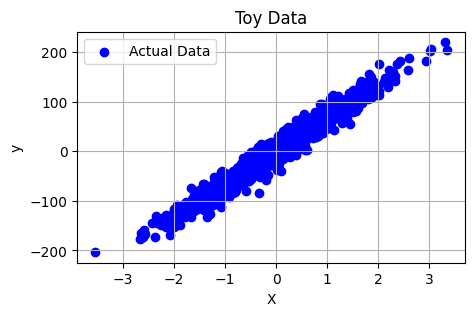

In [10]:
plt.figure(figsize=(5, 3))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.title('Toy Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

We'll split the dataset into training and testing subsets to evaluate the model's performance on unseen data.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now let's import the `LinearRegression` class from the `TiML` library!

In [12]:
from TiML.models import LinearRegression

model = LinearRegression()

And fit the model to our dataset!

In [13]:
model.fit(X_train, y_train)

Lastly, let's assess the performance of our model using the R-squared metric and Mean Squared Error (MSE).

In [14]:
r2 = model.score(X_test, y_test)
mse = model.score(X_test, y_test, mean_squared_error)

print(f"R-squared Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R-squared Score: 0.96
Mean Squared Error: 193.72


An $R^2$ score of 0.96 means that the model can explain 96% of the variability of the data. That is really good!

Let's see what our fit looks like!

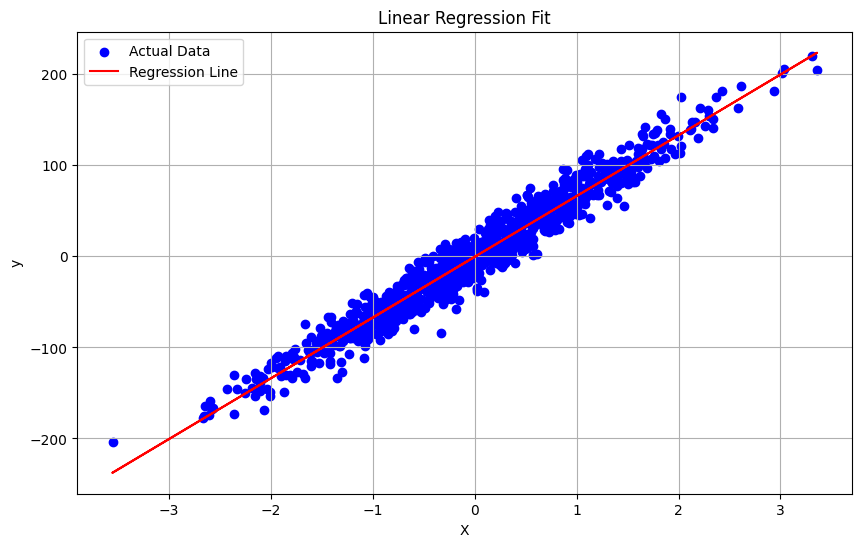

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()